In [196]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
import plotly.graph_objects as go
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import seaborn as sns
from sklearn.model_selection import train_test_split



In [198]:
df=pd.read_excel('C:/DATA SCIENCE/PLACEMENT/Buckman/Dataset/Sample Data for shortlisting.xlsx')
df.head()

,S. No.,City,Gender,Marital Status,Age,Education,Role,Number of investors in family,Household Income,Percentage of Investment,Source of Awareness about Investment,Knowledge level about different investment product,Knowledge level about sharemarket,Knowledge about Govt. Schemes,Investment Influencer,Investment Experience,Risk Level,Return Earned,Reason for Investment
0,1,New York,Men,Never Married,Early Working,Secondary,Marketing and Sales Executive,2,US$ 2736 to US$ 8205,Don't Want to Reveal,Television,7,9,4,Family Reference,Less Than 1 Year,Low,Negative Return,Tax
1,2,New York,Women,Married,Early Working,Middle,Advertising and Promotion Executive,2,US$ 19146 to US$ 24615,Don't Want to Reveal,Workers,7,5,2,Workers Reference,Less Than 1 Year,Low,10 to 12,Others
2,3,Seattle,Women,Married,Early Working,Teritary,Training and Development Executive,2,US$ 2736 to US$ 8205,Above 26%,Family,4,3,2,Friends Reference,Above 9 Years,Low,1 to 4,Return
3,4,San Francisco,Men,Never Married,Elderly,Uneducated,Training and Development Executive,5,US$ 19146 to US$ 24615,16% to 20%,Family,5,1,3,Friends Reference,7 Years to 9 Years,Low,10 to 12,Tax
4,5,San Francisco,Men,Married,Prime Working,Primary,Computer and Information System Executive,2,US$ 13676 to US$ 19145,16% to 20%,Workers,6,10,5,Family Reference,Above 9 Years,Low,5 to 6,Fun and Exitement


# **Data Cleaning**

In [199]:
df.set_index('S. No.',inplace=True)
df.head()

,City,Gender,Marital Status,Age,Education,Role,Number of investors in family,Household Income,Percentage of Investment,Source of Awareness about Investment,Knowledge level about different investment product,Knowledge level about sharemarket,Knowledge about Govt. Schemes,Investment Influencer,Investment Experience,Risk Level,Return Earned,Reason for Investment
S. No.,,,,,,,,,,,,,,,,,,
1,New York,Men,Never Married,Early Working,Secondary,Marketing and Sales Executive,2,US$ 2736 to US$ 8205,Don't Want to Reveal,Television,7,9,4,Family Reference,Less Than 1 Year,Low,Negative Return,Tax
2,New York,Women,Married,Early Working,Middle,Advertising and Promotion Executive,2,US$ 19146 to US$ 24615,Don't Want to Reveal,Workers,7,5,2,Workers Reference,Less Than 1 Year,Low,10 to 12,Others
3,Seattle,Women,Married,Early Working,Teritary,Training and Development Executive,2,US$ 2736 to US$ 8205,Above 26%,Family,4,3,2,Friends Reference,Above 9 Years,Low,1 to 4,Return
4,San Francisco,Men,Never Married,Elderly,Uneducated,Training and Development Executive,5,US$ 19146 to US$ 24615,16% to 20%,Family,5,1,3,Friends Reference,7 Years to 9 Years,Low,10 to 12,Tax
5,San Francisco,Men,Married,Prime Working,Primary,Computer and Information System Executive,2,US$ 13676 to US$ 19145,16% to 20%,Workers,6,10,5,Family Reference,Above 9 Years,Low,5 to 6,Fun and Exitement


In [201]:
def split_income(value):
    value = value.replace(',', '')  # Remove commas if present
    if ' to ' in value:
        # Split the range and convert to integers
        income_range = value.split(' to ')
        lower_income = int(''.join(char for char in income_range[0] if char.isdigit()))
        upper_income = int(''.join(char for char in income_range[1] if char.isdigit()))
    elif 'Above' in value:
        # Extract the upper limit from "Above" format and set lower limit greater
        upper_limit = int(''.join(char for char in value if char.isdigit()))
        lower_income = upper_limit + 1  # Set lower income greater than upper limit
        upper_income = np.inf
    else:
        # Convert the single value to integer
        lower_income = int(''.join(char for char in value if char.isdigit()))
        upper_income = lower_income  # Set upper income equal to lower income for single value
    return lower_income, upper_income

In [202]:
df[['Lower Income', 'Upper Income']] = df['Household Income'].apply(lambda x: pd.Series(split_income(x)))

print(df)

                 City Gender Marital Status            Age   Education  \
S. No.                                                                   
1            New York    Men  Never Married  Early Working   Secondary   
2            New York  Women        Married  Early Working      Middle   
3             Seattle  Women        Married  Early Working    Teritary   
4       San Francisco    Men  Never Married        Elderly  Uneducated   
5       San Francisco    Men        Married  Prime Working     Primary   
...               ...    ...            ...            ...         ...   
806           Seattle    Men        Married  Early Working   Secondary   
807           Seattle    Men  Never Married       Children   Secondary   
808     San Francisco    Men  Never Married       Children  Uneducated   
809           Memphis  Women        Married       Children  Uneducated   
810          New York    Men  Never Married  Prime Working      Middle   

                                     

In [203]:
mean=df['Upper Income'].mean()
mean_without_inf = df[df['Upper Income'] != np.inf]['Upper Income'].mean()
df['Upper Income'] = np.where((df['Upper Income'] == np.inf) & (mean_without_inf > df['Lower Income']),
                              mean_without_inf, df['Upper Income'])
df['Upper Income']=df['Upper Income'].round(1)
print(df)

                 City Gender Marital Status            Age   Education  \
S. No.                                                                   
1            New York    Men  Never Married  Early Working   Secondary   
2            New York  Women        Married  Early Working      Middle   
3             Seattle  Women        Married  Early Working    Teritary   
4       San Francisco    Men  Never Married        Elderly  Uneducated   
5       San Francisco    Men        Married  Prime Working     Primary   
...               ...    ...            ...            ...         ...   
806           Seattle    Men        Married  Early Working   Secondary   
807           Seattle    Men  Never Married       Children   Secondary   
808     San Francisco    Men  Never Married       Children  Uneducated   
809           Memphis  Women        Married       Children  Uneducated   
810          New York    Men  Never Married  Prime Working      Middle   

                                     

In [204]:
df['Upper Income'] = df['Upper Income'].replace(np.inf, 100000)
print(df)

                 City Gender Marital Status            Age   Education  \
S. No.                                                                   
1            New York    Men  Never Married  Early Working   Secondary   
2            New York  Women        Married  Early Working      Middle   
3             Seattle  Women        Married  Early Working    Teritary   
4       San Francisco    Men  Never Married        Elderly  Uneducated   
5       San Francisco    Men        Married  Prime Working     Primary   
...               ...    ...            ...            ...         ...   
806           Seattle    Men        Married  Early Working   Secondary   
807           Seattle    Men  Never Married       Children   Secondary   
808     San Francisco    Men  Never Married       Children  Uneducated   
809           Memphis  Women        Married       Children  Uneducated   
810          New York    Men  Never Married  Prime Working      Middle   

                                     

In [205]:
def clean_percentage(value):
    lower_limit = np.nan
    upper_limit = np.nan

    if 'Above' in value:
        digits = ''.join(char for char in value if char.isdigit())
        if digits:
            upper_limit = int(digits)
            lower_limit = upper_limit + 1
    elif 'Upto' in value:
        digits = ''.join(char for char in value if char.isdigit())
        if digits:
            lower_limit = 0
            upper_limit = int(digits)
    elif ' to ' in value:
        value_range = value.split(' to ')
        if len(value_range) >= 2:
            lower_limit_str = value_range[0].rstrip('%')
            upper_limit_str = value_range[1].rstrip('%')
            if lower_limit_str.isdigit() and upper_limit_str.isdigit():
                lower_limit = int(lower_limit_str)
                upper_limit = int(upper_limit_str)
    elif "Don't want to reveal" in value:
        lower_limit = np.nan
        upper_limit = np.nan
    elif value.isdigit():
        lower_limit = int(value)
        upper_limit = lower_limit

    return lower_limit, upper_limit

In [206]:
df[['Lower Percentage', 'Upper Percentage']] = df['Percentage of Investment'].apply(lambda x: pd.Series(clean_percentage(x)))

# Display the modified DataFrame
print(df.head(10))

                 City Gender Marital Status             Age   Education  \
S. No.                                                                    
1            New York    Men  Never Married   Early Working   Secondary   
2            New York  Women        Married   Early Working      Middle   
3             Seattle  Women        Married   Early Working    Teritary   
4       San Francisco    Men  Never Married         Elderly  Uneducated   
5       San Francisco    Men        Married   Prime Working     Primary   
6             Memphis  Women  Never Married   Prime Working     Primary   
7             Seattle  Women  Never Married   Prime Working    Teritary   
8             Houston  Women  Never Married  Mature Working      Middle   
9       San Francisco  Women  Never Married         Elderly      Middle   
10      San Francisco    Men        Married        Children   Secondary   

                                             Role  \
S. No.                                        

In [207]:
mean=df['Lower Percentage'].mean()
df['Lower Percentage'].fillna(mean,inplace=True)
df['Lower Percentage']=df['Lower Percentage'].round(1)
mean=df['Upper Percentage'].mean()
df['Upper Percentage'].fillna(mean,inplace=True)
df['Upper Percentage']=df['Upper Percentage'].round(1)
print(df)

                 City Gender Marital Status            Age   Education  \
S. No.                                                                   
1            New York    Men  Never Married  Early Working   Secondary   
2            New York  Women        Married  Early Working      Middle   
3             Seattle  Women        Married  Early Working    Teritary   
4       San Francisco    Men  Never Married        Elderly  Uneducated   
5       San Francisco    Men        Married  Prime Working     Primary   
...               ...    ...            ...            ...         ...   
806           Seattle    Men        Married  Early Working   Secondary   
807           Seattle    Men  Never Married       Children   Secondary   
808     San Francisco    Men  Never Married       Children  Uneducated   
809           Memphis  Women        Married       Children  Uneducated   
810          New York    Men  Never Married  Prime Working      Middle   

                                     

In [208]:
def clean_experience(value):
    years = np.nan

    if 'Less Than' in value:
        years = 0
    elif 'Above' in value:
        years_str = ''.join(char for char in value if char.isdigit())
        if years_str:
            years = int(years_str) + 1
    elif ' to ' in value:
        value_range = value.split(' to ')
        if len(value_range) >= 2:
            lower_limit_str = value_range[0].rstrip(' Years')
            upper_limit_str = value_range[1].rstrip(' Years')
            if lower_limit_str.isdigit() and upper_limit_str.isdigit():
                lower_limit = int(lower_limit_str)
                upper_limit = int(upper_limit_str)
                years = (lower_limit + upper_limit) // 2  # Average of the range
    elif value.isdigit():
        years = int(value)

    return years


In [209]:
df['Average Investment Experience'] = df['Investment Experience'].apply(clean_experience)
print(df.head(10))

                 City Gender Marital Status             Age   Education  \
S. No.                                                                    
1            New York    Men  Never Married   Early Working   Secondary   
2            New York  Women        Married   Early Working      Middle   
3             Seattle  Women        Married   Early Working    Teritary   
4       San Francisco    Men  Never Married         Elderly  Uneducated   
5       San Francisco    Men        Married   Prime Working     Primary   
6             Memphis  Women  Never Married   Prime Working     Primary   
7             Seattle  Women  Never Married   Prime Working    Teritary   
8             Houston  Women  Never Married  Mature Working      Middle   
9       San Francisco  Women  Never Married         Elderly      Middle   
10      San Francisco    Men        Married        Children   Secondary   

                                             Role  \
S. No.                                        

In [210]:
class_labels = df['Return Earned'].unique()
print(class_labels)

['Negative Return' '10 to 12 ' '1 to 4' '5 to 6' '7 to 9' 'More than 13']


In [211]:
label_encoder = LabelEncoder()

# Fit and transform the "Returns Earned" column
df['Return Encoded'] = label_encoder.fit_transform(df['Return Earned'])

# Display the encoded DataFrame
print(df)

                 City Gender Marital Status            Age   Education  \
S. No.                                                                   
1            New York    Men  Never Married  Early Working   Secondary   
2            New York  Women        Married  Early Working      Middle   
3             Seattle  Women        Married  Early Working    Teritary   
4       San Francisco    Men  Never Married        Elderly  Uneducated   
5       San Francisco    Men        Married  Prime Working     Primary   
...               ...    ...            ...            ...         ...   
806           Seattle    Men        Married  Early Working   Secondary   
807           Seattle    Men  Never Married       Children   Secondary   
808     San Francisco    Men  Never Married       Children  Uneducated   
809           Memphis  Women        Married       Children  Uneducated   
810          New York    Men  Never Married  Prime Working      Middle   

                                     

In [212]:
columns_newdf=['City','Gender','Marital Status','Age','Education','Role','Number of investors in family','Lower Income','Upper Income',
               'Lower Percentage','Upper Percentage','Source of Awareness about Investment','Average Investment Experience','Risk Level','Reason for Investment','Return Earned']

data1=df[columns_newdf]
print(data1)

                 City Gender Marital Status            Age   Education  \
S. No.                                                                   
1            New York    Men  Never Married  Early Working   Secondary   
2            New York  Women        Married  Early Working      Middle   
3             Seattle  Women        Married  Early Working    Teritary   
4       San Francisco    Men  Never Married        Elderly  Uneducated   
5       San Francisco    Men        Married  Prime Working     Primary   
...               ...    ...            ...            ...         ...   
806           Seattle    Men        Married  Early Working   Secondary   
807           Seattle    Men  Never Married       Children   Secondary   
808     San Francisco    Men  Never Married       Children  Uneducated   
809           Memphis  Women        Married       Children  Uneducated   
810          New York    Men  Never Married  Prime Working      Middle   

                                     

In [213]:
data1.to_excel('modified investments.xlsx',index=False)

# **Data Exploration**

In [214]:
gender_distribution = data1['Gender'].value_counts().reset_index()
print(gender_distribution)

   index  Gender
0  Women     427
1    Men     383


In [215]:
marital_status_distribution = data1['Marital Status'].value_counts().reset_index()
print(marital_status_distribution)

           index  Marital Status
0  Never Married             405
1        Married             405


In [216]:
age_distribution = data1['Age'].value_counts().reset_index()
print(age_distribution)

            index  Age
0  Mature Working  183
1   Prime Working  163
2        Children  159
3         Elderly  158
4   Early Working  147


In [217]:
gender_distribution.columns = ['Gender', 'Count']
marital_status_distribution.columns = ['Marital Status', 'Count']
age_distribution.columns = ['Age', 'Count']
gender_fig = px.pie(gender_distribution, names='Gender', values='Count', title='Gender Distribution')
marital_fig = px.pie(marital_status_distribution, names='Marital Status', values='Count', title='Marital Status Distribution')
age_fig = px.bar(age_distribution, x='Age', y='Count', title='Age Distribution')

# Show the plots
gender_fig.show()
marital_fig.show()
age_fig.show()


In [218]:
edu = data1['Education'].value_counts().reset_index()
print(edu)

role = data1['Role'].value_counts().reset_index()
print(role)

lower=data1['Lower Income'].value_counts().reset_index()
print(lower)

upper=data1['Upper Income'].value_counts().reset_index()
print(upper)

        index  Education
0    Teritary        172
1      Middle        171
2  Uneducated        162
3   Secondary        161
4     Primary        144
                                       index  Role
0                             Top Executives   175
1         Training and Development Executive   172
2              Marketing and Sales Executive   162
3  Computer and Information System Executive   160
4        Advertising and Promotion Executive   141
     index  Lower Income
0  30087.0           123
1   2735.0           121
2  13676.0           118
3   2736.0           115
4  19146.0           115
5   8206.0           114
6  24616.0           104
      index  Upper Income
0  100000.0           123
1    2735.0           121
2   19145.0           118
3    8205.0           115
4   24615.0           115
5   13675.0           114
6   30085.0           104


In [219]:
# edu.columns = ['Education', 'Count']
# role.columns = ['Role', 'Count']
# lower.columns = ['Lower Income in Dollars', 'Count']
# upper.columns = ['Upper Income in Dollars','Count']
grouped_df = df.groupby(['Education', 'Role']).size().reset_index(name='Count')
stacked_fig = px.bar(grouped_df, x='Education', y='Count', color='Role', title='Demographic Distribution',
                      barmode='stack')
stacked_fig.show()

In [220]:
grouped_df = df.groupby(['Role', 'Education']).size().reset_index(name='Count')
sunburst_fig = px.sunburst(grouped_df, path=['Role', 'Education'], values='Count',
                            title='Sunburst Chart - Role, Education')
sunburst_fig.show()

In [221]:
selected_df = df.loc[:, ['Role', 'Lower Income']]

# Melt the DataFrame to create a long-form DataFrame for Plotly Express
melted_df = selected_df.melt(id_vars='Role', var_name='Income Type', value_name='Income')

# Split 'Lower Income' into separate bars based on income values
melted_df['Income Type'] = melted_df['Income Type'] + '_' + melted_df['Income'].astype(str)

# Create clustered column chart with no separators within bars
clustered_fig = px.bar(melted_df, x='Role', y='Income', color='Income Type',
                        barmode='group', title='Clustered Column Chart - Role vs.Lower Income')


# Show the plot
clustered_fig.show()

In [222]:
selected_df = df.loc[:, ['Role', 'Upper Income']]

# Melt the DataFrame to create a long-form DataFrame for Plotly Express
melted_df = selected_df.melt(id_vars='Role', var_name='Income Type', value_name='Income')

# Split 'Lower Income' into separate bars based on income values
melted_df['Income Type'] = melted_df['Income Type'] + '_' + melted_df['Income'].astype(str)

# Create clustered column chart with no separators within bars
clustered_fig = px.bar(melted_df, x='Role', y='Income', color='Income Type',
                        barmode='group', title='Clustered Column Chart - Role vs. Upper Income')


# Show the plot
clustered_fig.show()

In [223]:
sunburst_fig = px.sunburst(data1, path=['City', 'Number of investors in family'], values='Number of investors in family',
                            title='Sunburst Chart - City and Number of Investors')

# Show the plot
sunburst_fig.show()

In [224]:
low = df['Lower Percentage'].value_counts().reset_index()
print(low)

high=df['Upper Percentage'].value_counts().reset_index()
print(high)

   index  Lower Percentage
0   27.0               130
1    0.0               122
2    6.0               122
3   21.0               117
4   11.0               113
5   13.6               104
6   16.0               102
   index  Upper Percentage
0   26.0               130
1    5.0               122
2   10.0               122
3   25.0               117
4   15.0               113
5   16.8               104
6   20.0               102


In [225]:
edu.columns = ['Lower Percentage', 'Count']
role.columns = ['Upper Percentage', 'Count']
fig = px.bar(data1, x="City", y=["Lower Percentage", "Upper Percentage"], title="Upper and Lower Investment Percent")
fig.show()

In [226]:
risk_return_counts = data1.groupby(['Return Earned', 'Risk Level']).size().reset_index(name='Count')

# Create a bar chart to visualize the relationship between 'Return' and 'Risk'
bar_chart = px.bar(risk_return_counts, x='Return Earned', y='Count', color='Risk Level',
                    title='Relationship between Return and Risk',
                    labels={'Return': 'Return Level', 'Count': 'Frequency'})

# Show the plot
bar_chart.show()

# **Best Investment Decision**

In [227]:
data1.columns

Index(['City', 'Gender', 'Marital Status', 'Age', 'Education', 'Role',
       'Number of investors in family', 'Lower Income', 'Upper Income',
       'Lower Percentage', 'Upper Percentage',
       'Source of Awareness about Investment', 'Average Investment Experience',
       'Risk Level', 'Reason for Investment', 'Return Earned'],
      dtype='object')

In [228]:
data1.dtypes

City                                     object
Gender                                   object
Marital Status                           object
Age                                      object
Education                                object
Role                                     object
Number of investors in family             int64
Lower Income                            float64
Upper Income                            float64
Lower Percentage                        float64
Upper Percentage                        float64
Source of Awareness about Investment     object
Average Investment Experience             int64
Risk Level                               object
Reason for Investment                    object
Return Earned                            object
dtype: object

In [237]:
from sklearn.preprocessing import LabelEncoder

# Initialize an empty dictionary to store mappings
label_mappings = {}

data2 = data1.copy()  # Make a copy to avoid modifying the original DataFrame

# Loop through each column
for column in data2.columns:
    # Check if the column contains categorical data (non-numeric)
    if data2[column].dtype == 'object':
        # Initialize LabelEncoder for each column
        label_encoder = LabelEncoder()
        
        # Fit LabelEncoder and transform the column
        encoded_values = label_encoder.fit_transform(data2[column])
        
        # Store the fitted LabelEncoder in label_mappings
        label_mappings[column] = label_encoder
        
        # Replace the original column with encoded values
        data2[column] = encoded_values

# Print the encoded DataFrame
print(data2)

# Print the label mappings
print(label_mappings)


        City  Gender  Marital Status  Age  Education  Role  \
S. No.                                                       
1          2       0               1    1          2     2   
2          2       1               0    1          0     0   
3          4       1               0    1          3     4   
4          3       0               1    2          4     4   
5          3       0               0    4          1     1   
...      ...     ...             ...  ...        ...   ...   
806        4       0               0    1          2     3   
807        4       0               1    0          2     3   
808        3       0               1    0          4     0   
809        1       1               0    0          4     2   
810        2       0               1    4          0     4   

        Number of investors in family  Lower Income  Upper Income  \
S. No.                                                              
1                                   2        2736.0    

C:\Users\dhivy\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\dhivy\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\dhivy\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\dhivy\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\dhivy\AppData\Roaming\Pytho

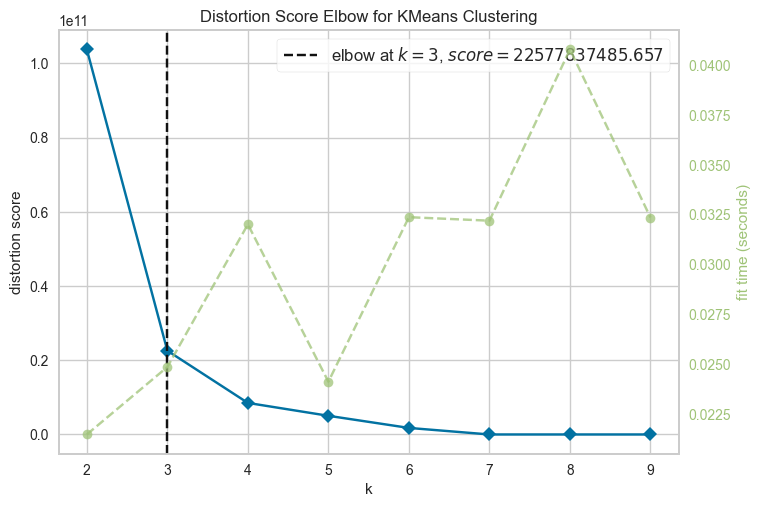

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [239]:
# Instantiate the clustering model and visualizer
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))
 
visualizer.fit(data2)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [245]:
# Apply k-means clustering with the optimal k value
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(data2)

# Add cluster labels to the DataFrame
data2['Cluster'] = clusters

# Display the DataFrame with cluster labels
print(data2.head())

        City  Gender  Marital Status  Age  Education  Role  \
S. No.                                                       
1          2       0               1    1          2     2   
2          2       1               0    1          0     0   
3          4       1               0    1          3     4   
4          3       0               1    2          4     4   
5          3       0               0    4          1     1   

        Number of investors in family  Lower Income  Upper Income  \
S. No.                                                              
1                                   2        2736.0        8205.0   
2                                   2       19146.0       24615.0   
3                                   2        2736.0        8205.0   
4                                   5       19146.0       24615.0   
5                                   2       13676.0       19145.0   

        Lower Percentage  Upper Percentage  \
S. No.                             

In [119]:
data1.to_excel('with decision.xlsx')

In [246]:
kmeans = KMeans(n_clusters = 3, init = "k-means++", random_state = 42)
y_kmeans = kmeans.fit_predict(data2)
print(y_kmeans)

C:\Users\dhivy\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



[0 2 0 2 2 2 2 1 2 2 2 0 0 1 2 2 2 0 2 0 0 0 0 0 0 2 2 2 2 1 0 1 1 0 0 2 2
 0 0 0 0 2 1 2 0 0 0 0 2 2 2 2 0 2 2 0 0 0 2 1 1 1 2 1 2 0 0 2 2 1 2 2 2 0
 2 1 2 0 2 0 1 0 2 2 0 0 0 0 2 2 0 0 2 0 2 0 2 2 0 1 0 0 2 2 2 2 2 2 0 2 1
 0 0 0 2 0 0 2 0 0 0 0 1 0 0 2 0 2 2 0 2 1 1 0 2 2 0 1 0 0 2 0 0 0 2 1 0 2
 2 0 2 2 0 2 2 1 2 0 2 2 2 0 0 0 2 1 1 0 0 2 1 0 2 0 1 0 0 0 2 0 2 0 1 0 2
 0 2 0 2 1 2 0 0 0 2 0 2 2 0 2 1 0 1 2 0 0 2 2 0 1 2 0 0 2 0 2 0 2 0 2 2 2
 0 1 0 0 0 2 0 2 1 0 0 1 0 0 2 0 0 1 2 2 2 0 2 2 2 2 0 1 1 2 2 0 1 0 2 0 0
 2 0 0 0 0 2 0 2 0 0 1 2 2 2 2 2 0 2 1 0 0 0 0 0 0 2 0 2 0 0 0 1 0 1 1 1 1
 2 1 1 0 2 2 1 0 0 0 2 0 0 2 0 0 2 2 0 0 0 2 0 1 0 0 2 0 2 2 2 2 2 0 2 0 1
 1 0 0 0 1 1 0 2 0 0 0 2 2 0 0 0 0 1 2 1 2 2 0 0 2 2 0 2 0 1 2 0 2 1 1 0 2
 0 2 2 1 0 0 2 2 2 2 0 2 0 1 2 2 1 2 0 2 0 1 2 2 2 2 2 2 2 2 0 0 0 2 0 0 0
 2 2 2 0 2 0 0 2 0 0 2 0 2 0 0 0 2 1 2 2 1 2 0 2 0 1 2 0 2 0 0 1 2 1 2 2 2
 2 0 2 0 0 0 1 2 2 2 0 2 1 2 2 2 0 0 2 1 1 1 0 2 0 2 2 2 1 2 2 0 0 2 0 2 0
 0 0 2 0 2 2 1 0 1 0 2 1 

In [247]:
data2['Cluster'].value_counts()

2    350
0    337
1    123
Name: Cluster, dtype: int64

In [252]:
data2.corr()

,City,Gender,Marital Status,Age,Education,Role,Number of investors in family,Lower Income,Upper Income,Lower Percentage,Upper Percentage,Source of Awareness about Investment,Average Investment Experience,Risk Level,Reason for Investment,Return Earned,Cluster
City,1.000000,-0.068255,-0.021529,-0.109233,0.007171,-0.016187,0.050827,-0.025420,-0.042309,-0.026361,-0.034193,-0.059268,-0.040482,0.002186,0.011696,0.038571,-0.018574
Gender,-0.068255,1.000000,-0.022255,0.003160,-0.009139,0.004265,0.005139,0.034135,0.006050,0.006041,0.008477,0.011365,-0.013859,0.071505,-0.003127,0.013541,-0.047944
Marital Status,-0.021529,-0.022255,1.000000,-0.020980,0.017311,0.041550,0.073727,-0.036638,-0.043704,0.057325,0.060046,-0.044281,-0.032193,-0.072618,-0.008772,0.017050,0.001341
Age,-0.109233,0.003160,-0.020980,1.000000,0.022956,0.041199,0.000526,0.056801,0.016225,-0.022284,-0.021150,0.036812,0.077061,-0.040497,-0.028090,0.019635,-0.086111
Education,0.007171,-0.009139,0.017311,0.022956,1.000000,0.024203,-0.065585,-0.018221,-0.039407,0.014991,0.013044,-0.005093,-0.013771,0.028926,0.040455,0.008086,-0.038691
Role,-0.016187,0.004265,0.041550,0.041199,0.024203,1.000000,-0.009910,0.007735,0.013365,-0.031755,-0.041986,0.023234,0.004194,0.028265,-0.010979,0.042380,0.000734
Number of investors in family,0.050827,0.005139,0.073727,0.000526,-0.065585,-0.009910,1.000000,-0.013290,-0.028506,-0.049125,-0.039170,0.021267,0.037312,-0.002069,0.004267,0.010204,-0.014731
Lower Income,-0.025420,0.034135,-0.036638,0.056801,-0.018221,0.007735,-0.013290,1.000000,0.841433,0.000848,0.001436,-0.025448,0.030613,-0.073263,-0.002272,0.045088,-0.670990
Upper Income,-0.042309,0.006050,-0.043704,0.016225,-0.039407,0.013365,-0.028506,0.841433,1.000000,-0.014519,-0.015143,-0.033530,0.004457,-0.064647,0.004911,0.012607,-0.246694
Lower Percentage,-0.026361,0.006041,0.057325,-0.022284,0.014991,-0.031755,-0.049125,0.000848,-0.014519,1.000000,0.985927,0.029518,0.004803,0.029401,0.003493,0.041896,-0.015046


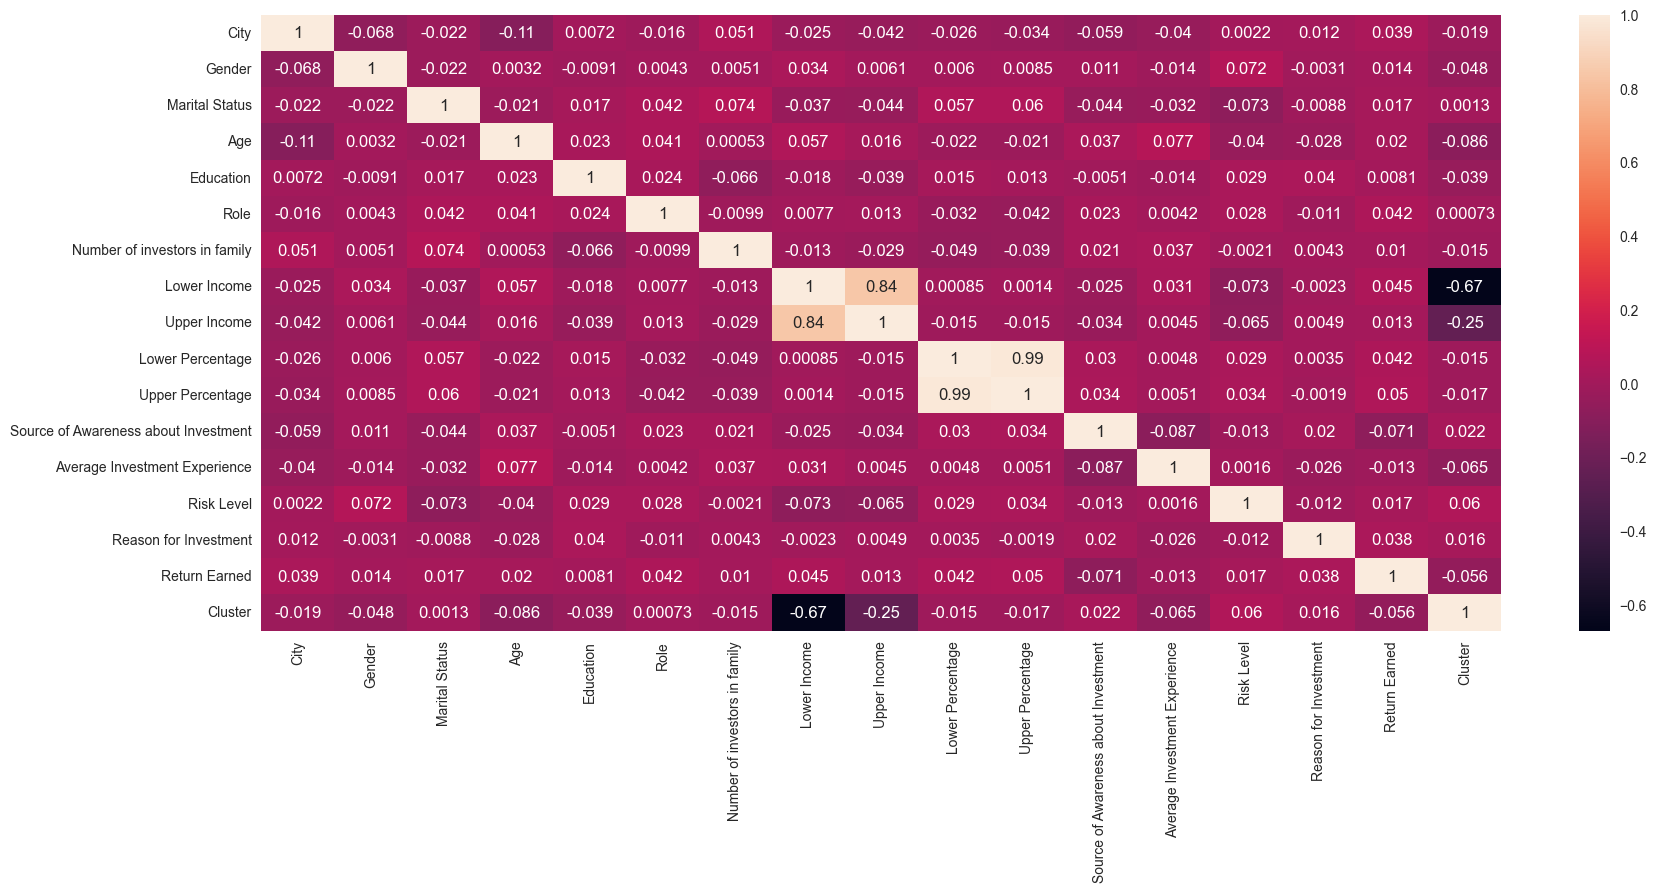

In [253]:
fig, ax = plt.subplots(figsize=(20, 8))
corr = data2.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
               annot=True)
plt.show()

In [254]:
from sklearn.feature_selection import mutual_info_classif
Y=data2['Cluster']
X=data2.drop('Cluster',axis=1)
feature_names = data2.columns

# Calculate mutual information scores
mi_scores = mutual_info_classif(X, Y)

# Print the mutual information scores for each feature
for feature, score in zip(feature_names, mi_scores):
    print(f"{feature}: Mutual Information Score = {score:.4f}")

City: Mutual Information Score = 0.0000
Gender: Mutual Information Score = 0.0000
Marital Status: Mutual Information Score = 0.0166
Age: Mutual Information Score = 0.0188
Education: Mutual Information Score = 0.0000
Role: Mutual Information Score = 0.0045
Number of investors in family: Mutual Information Score = 0.0000
Lower Income: Mutual Information Score = 1.0149
Upper Income: Mutual Information Score = 1.0149
Lower Percentage: Mutual Information Score = 0.0000
Upper Percentage: Mutual Information Score = 0.0000
Source of Awareness about Investment: Mutual Information Score = 0.0260
Average Investment Experience: Mutual Information Score = 0.0114
Risk Level: Mutual Information Score = 0.0000
Reason for Investment: Mutual Information Score = 0.0000
Return Earned: Mutual Information Score = 0.0089


In [255]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# Assuming X_train and y_train are your training features and target
# Initialize the Lasso model with alpha (regularization strength)
lasso_model = Lasso(alpha=0.1)  # You can adjust the alpha value as needed

# Fit the Lasso model to the training data
lasso_model.fit(X, Y)

# Create a feature selection model based on the Lasso coefficients
feature_selection_model = SelectFromModel(lasso_model)

# Transform the training features to select the important features
X_train_selected = feature_selection_model.transform(X)

# Get the selected feature names
selected_feature_names = X.columns[feature_selection_model.get_support()]

# Print the selected feature names
print("Selected Features:", list(selected_feature_names))


C:\Users\dhivy\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:458: UserWarning:

X has feature names, but SelectFromModel was fitted without feature names



Selected Features: ['Lower Income', 'Upper Income']


In [256]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import mutual_info_classif

# Assuming X_train and y_train are your training features and target
# Initialize a decision tree classifier
clf = DecisionTreeClassifier(random_state=0)

# Fit the classifier to the training data
clf.fit(X,Y)

# Calculate information gain (mutual information) for each feature
info_gain = mutual_info_classif(X,Y)

# Create a DataFrame to store feature names and their corresponding information gains
feature_info_gain = pd.DataFrame({'Feature': list(X.columns), 'Information Gain': info_gain})

# Sort the DataFrame by information gain in descending order
feature_info_gain.sort_values(by='Information Gain', ascending=False, inplace=True)

# Print the DataFrame to see feature names and their information gains
print(feature_info_gain)


                                 Feature  Information Gain
7                           Lower Income          1.014883
8                           Upper Income          1.014883
15                         Return Earned          0.017007
4                              Education          0.015252
1                                 Gender          0.011121
0                                   City          0.005133
10                      Upper Percentage          0.002623
11  Source of Awareness about Investment          0.000521
2                         Marital Status          0.000000
3                                    Age          0.000000
5                                   Role          0.000000
6          Number of investors in family          0.000000
9                       Lower Percentage          0.000000
12         Average Investment Experience          0.000000
13                            Risk Level          0.000000
14                 Reason for Investment          0.0000

In [257]:
info_gain_dict = dict(zip(feature_info_gain['Feature'], feature_info_gain['Information Gain']))

# Filter keys based on information gain threshold (0.01)
selected_features = [key for key, value in info_gain_dict.items() if value > 0.001]

# Print selected features
print("Selected Features:", selected_features)

Selected Features: ['Lower Income', 'Upper Income', 'Return Earned', 'Education', 'Gender', 'City', 'Upper Percentage']


In [258]:
data = data2.sample(frac=1).reset_index(drop=True)

In [259]:
fin_X=pd.DataFrame()
for column in selected_features:
    fin_X = pd.concat([fin_X, data[column]], axis=1)
print(fin_X)

     Lower Income  Upper Income  Return Earned  Education  Gender  City  \
0          2736.0        8205.0              2          2       0     2   
1          8206.0       13675.0              3          1       1     0   
2          8206.0       13675.0              3          0       0     2   
3         13676.0       19145.0              1          2       0     3   
4         24616.0       30085.0              3          4       1     4   
..            ...           ...            ...        ...     ...   ...   
805       24616.0       30085.0              5          1       1     4   
806       13676.0       19145.0              0          1       1     1   
807        8206.0       13675.0              1          0       0     3   
808        2735.0        2735.0              1          0       0     3   
809        2736.0        8205.0              4          4       1     0   

     Upper Percentage  
0                25.0  
1                25.0  
2                25.0  
3  

In [260]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(fin_X, Y, test_size=0.2, random_state=42)
len(X_train),len(X_test)

(648, 162)

In [262]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy ",accuracy)
print("Classification report ",classification_report(y_test, y_pred))

Accuracy  0.41358024691358025
Classification report                precision    recall  f1-score   support

           0       0.42      0.44      0.43        64
           1       0.28      0.24      0.26        33
           2       0.47      0.48      0.47        65

    accuracy                           0.41       162
   macro avg       0.39      0.39      0.39       162
weighted avg       0.41      0.41      0.41       162



### Only if the data overfits

In [151]:
path=decision_tree.cost_complexity_pruning_path(X_train,y_train)
alphas=path['ccp_alphas']

alphas

array([0.        , 0.0003858 , 0.0005144 , 0.00093236, 0.00095532,
       0.00102881, 0.00102881, 0.00102881, 0.00102881, 0.00102881,
       0.00102881, 0.00102881, 0.00102881, 0.00107167, 0.00115741,
       0.00115741, 0.00115741, 0.00115741, 0.00115741, 0.00123457,
       0.00123457, 0.00123457, 0.00123457, 0.00128601, 0.00128601,
       0.00128601, 0.00128601, 0.00128601, 0.00128601, 0.00130316,
       0.00132275, 0.00132275, 0.00132275, 0.00132275, 0.00135031,
       0.00137643, 0.00138889, 0.00141461, 0.00144676, 0.00145339,
       0.00154321, 0.00154321, 0.00154321, 0.00154321, 0.00154321,
       0.00154321, 0.00154321, 0.00154321, 0.00154321, 0.00154321,
       0.00154321, 0.00154321, 0.00154321, 0.00154321, 0.00160037,
       0.00164609, 0.00165038, 0.00166538, 0.00169753, 0.00169753,
       0.00169937, 0.00170855, 0.00173611, 0.00177118, 0.00177837,
       0.00180041, 0.0018107 , 0.00183715, 0.00183998, 0.00184317,
       0.0018494 , 0.00185185, 0.00185185, 0.00185185, 0.00191

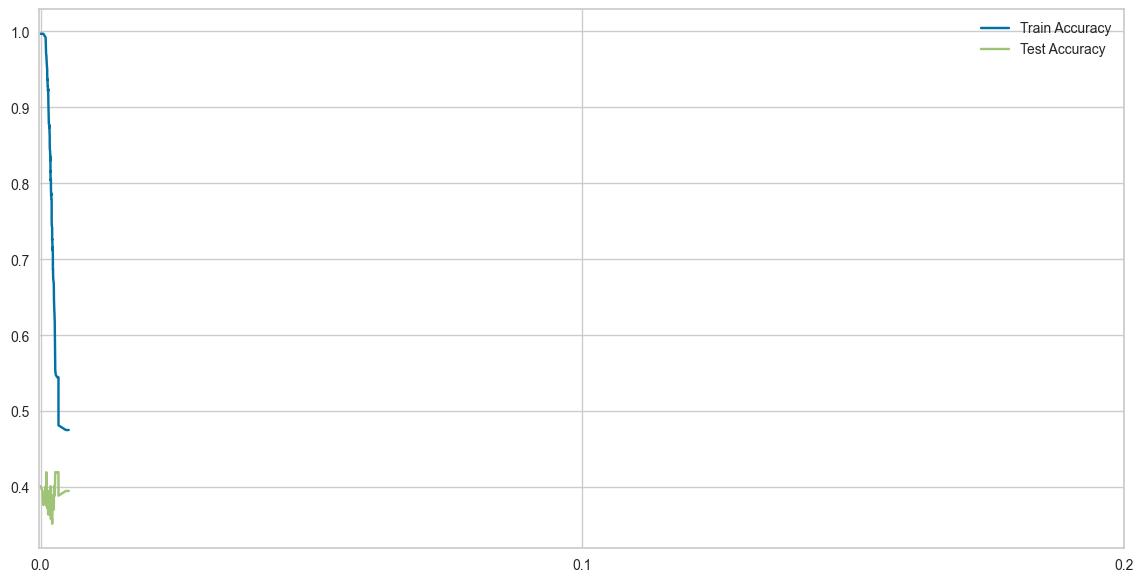

In [152]:
accuracy_train=[]
accuracy_test=[]
for i in alphas:
    decision_tree=DecisionTreeClassifier(ccp_alpha=i)
    decision_tree.fit(X_train,y_train)
    y_train_pred=decision_tree.predict(X_train)
    y_test_pred=decision_tree.predict(X_test)
    accuracy_train.append(accuracy_score(y_train,y_train_pred))
    accuracy_test.append(accuracy_score(y_test,y_test_pred))

plt.figure(figsize=(14,7))
sns.lineplot(y=accuracy_train,x=alphas,label="Train Accuracy")
sns.lineplot(y=accuracy_test,x=alphas,label="Test Accuracy")
plt.xticks(ticks=np.arange(0.00,0.25,0.1))
plt.show()

In [153]:
decision_tree=DecisionTreeClassifier(ccp_alpha=0.02,random_state=40)
decision_tree.fit(X_train,y_train)
y_train_pred=decision_tree.predict(X_train)
y_test_pred=decision_tree.predict(X_test)
print(accuracy_score(y_train,y_train_pred),accuracy_score(y_test,y_test_pred))

0.4398148148148148 0.4012345679012346


In [154]:
clfs=[]
for ccp_alpha in alphas:
    clf=DecisionTreeClassifier(random_state=1,ccp_alpha=ccp_alpha)
    clf.fit(X_train,y_train)
    clfs.append(clf)
print(clfs)

[DecisionTreeClassifier(random_state=1), DecisionTreeClassifier(ccp_alpha=0.00038580246913580245, random_state=1), DecisionTreeClassifier(ccp_alpha=0.0005144032921810698, random_state=1), DecisionTreeClassifier(ccp_alpha=0.0009323559670781893, random_state=1), DecisionTreeClassifier(ccp_alpha=0.0009553203997648444, random_state=1), DecisionTreeClassifier(ccp_alpha=0.0010288065843621398, random_state=1), DecisionTreeClassifier(ccp_alpha=0.0010288065843621398, random_state=1), DecisionTreeClassifier(ccp_alpha=0.0010288065843621398, random_state=1), DecisionTreeClassifier(ccp_alpha=0.0010288065843621398, random_state=1), DecisionTreeClassifier(ccp_alpha=0.0010288065843621398, random_state=1), DecisionTreeClassifier(ccp_alpha=0.0010288065843621398, random_state=1), DecisionTreeClassifier(ccp_alpha=0.0010288065843621398, random_state=1), DecisionTreeClassifier(ccp_alpha=0.0010288065843621398, random_state=1), DecisionTreeClassifier(ccp_alpha=0.00107167352537723, random_state=1), DecisionTre

In [155]:
from sklearn.metrics import mean_absolute_error
scores=[]
for ccp_alpha in alphas:
    clf=DecisionTreeClassifier(random_state=1,ccp_alpha=ccp_alpha)
    clf.fit(X_train,y_train)
    new_pred=clf.predict(X_test)
    new_pred=new_pred.reshape(-1,1)
    new_accuracy=mean_absolute_error(new_pred,y_test)
    scores.append(new_accuracy)
print(scores)



[0.9691358024691358, 0.9691358024691358, 0.9691358024691358, 0.9691358024691358, 0.9691358024691358, 0.9814814814814815, 0.9814814814814815, 0.9814814814814815, 0.9814814814814815, 0.9814814814814815, 0.9814814814814815, 0.9814814814814815, 0.9814814814814815, 0.9814814814814815, 0.9814814814814815, 0.9814814814814815, 0.9814814814814815, 0.9814814814814815, 0.9814814814814815, 0.9938271604938271, 0.9938271604938271, 0.9938271604938271, 0.9938271604938271, 1.0061728395061729, 1.0061728395061729, 1.0061728395061729, 1.0061728395061729, 1.0061728395061729, 1.0061728395061729, 1.0061728395061729, 1.0061728395061729, 1.0061728395061729, 1.0061728395061729, 1.0061728395061729, 1.0061728395061729, 1.0061728395061729, 1.0123456790123457, 1.0123456790123457, 1.0246913580246915, 1.0246913580246915, 1.0185185185185186, 1.0185185185185186, 1.0185185185185186, 1.0185185185185186, 1.0185185185185186, 1.0185185185185186, 1.0185185185185186, 1.0185185185185186, 1.0185185185185186, 1.0185185185185186,

In [156]:
min_error=min(scores)
index=scores.index(min_error)
best_alpha=alphas[index]

print(best_alpha)
print(min_error)


0.0027207977798550647
0.9506172839506173


In [263]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif

# Assuming X_train and y_train are your training features and target
# Initialize a decision tree classifier
clf_rand = RandomForestClassifier(random_state=0)

# Fit the classifier to the training data
clf_rand.fit(X,Y)

# Calculate information gain (mutual information) for each feature
info_gain_rand = mutual_info_classif(X,Y)

# Create a DataFrame to store feature names and their corresponding information gains
feature_info_gain_rand = pd.DataFrame({'Feature': list(X.columns), 'Information Gain': info_gain})

# Sort the DataFrame by information gain in descending order
feature_info_gain_rand.sort_values(by='Information Gain', ascending=False, inplace=True)

# Print the DataFrame to see feature names and their information gains
print(feature_info_gain_rand)


                                 Feature  Information Gain
7                           Lower Income          1.014883
8                           Upper Income          1.014883
15                         Return Earned          0.017007
4                              Education          0.015252
1                                 Gender          0.011121
0                                   City          0.005133
10                      Upper Percentage          0.002623
11  Source of Awareness about Investment          0.000521
2                         Marital Status          0.000000
3                                    Age          0.000000
5                                   Role          0.000000
6          Number of investors in family          0.000000
9                       Lower Percentage          0.000000
12         Average Investment Experience          0.000000
13                            Risk Level          0.000000
14                 Reason for Investment          0.0000

In [264]:
info_gain_dict_rand = dict(zip(feature_info_gain_rand['Feature'], feature_info_gain_rand['Information Gain']))

# Filter keys based on information gain threshold (0.01)
selected_features_rand = [key for key, value in info_gain_dict_rand.items() if value > 0.005]

# Print selected features
print("Selected Features:", selected_features_rand)

Selected Features: ['Lower Income', 'Upper Income', 'Return Earned', 'Education', 'Gender', 'City']


In [265]:
fin_X_rand=pd.DataFrame()
for column in selected_features_rand:
    fin_X_rand = pd.concat([fin_X_rand, data[column]], axis=1)
print(fin_X_rand)

     Lower Income  Upper Income  Return Earned  Education  Gender  City
0          2736.0        8205.0              2          2       0     2
1          8206.0       13675.0              3          1       1     0
2          8206.0       13675.0              3          0       0     2
3         13676.0       19145.0              1          2       0     3
4         24616.0       30085.0              3          4       1     4
..            ...           ...            ...        ...     ...   ...
805       24616.0       30085.0              5          1       1     4
806       13676.0       19145.0              0          1       1     1
807        8206.0       13675.0              1          0       0     3
808        2735.0        2735.0              1          0       0     3
809        2736.0        8205.0              4          4       1     0

[810 rows x 6 columns]


In [266]:
from sklearn.model_selection import train_test_split
X_tr, X_te, y_tr, y_te = train_test_split(fin_X_rand, Y, test_size=0.2, random_state=42)
len(X_tr),len(X_te)

(648, 162)

In [268]:
from sklearn.ensemble import RandomForestClassifier
model_rand = RandomForestClassifier(random_state=0)
model_rand.fit(X_tr, y_tr)
y_pred_rand = model_rand.predict(X_te)
accuracy_rand = accuracy_score(y_te, y_pred_rand)
print("Accuracy ",accuracy_rand)
print("Classification report ",classification_report(y_te, y_pred_rand))

Accuracy  0.41975308641975306
Classification report                precision    recall  f1-score   support

           0       0.43      0.50      0.46        64
           1       0.08      0.03      0.04        33
           2       0.47      0.54      0.50        65

    accuracy                           0.42       162
   macro avg       0.33      0.36      0.33       162
weighted avg       0.37      0.42      0.39       162



In [269]:
from sklearn.linear_model import RidgeClassifier

alpha = 1.0  
max_iter = 1000  
solver = 'auto' 
tol = 1e-3 
ridge_classifier = RidgeClassifier(alpha=alpha, max_iter=max_iter, solver=solver, tol=tol)
ridge_classifier.fit(X_train, y_train)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.41358024691358025


In [270]:
from sklearn.svm import SVC
svc = SVC(probability=True)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy ",accuracy)
print("Classification report ",classification_report(y_test, y_pred))

Accuracy  0.3395061728395062


C:\Users\dhivy\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\dhivy\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\dhivy\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Classification report                precision    recall  f1-score   support

           0       0.32      0.34      0.33        64
           1       0.00      0.00      0.00        33
           2       0.35      0.51      0.42        65

    accuracy                           0.34       162
   macro avg       0.22      0.28      0.25       162
weighted avg       0.27      0.34      0.30       162



In [271]:
label_mappings={'City':{'New York':2, 'Seattle':4, 'San Francisco':3, 'Memphis':1, 'Houston':0,}, 'Gender':{'Men':0, 'Women':1},'Marital Status':{'Married':0,'Never Married':1},
                'Age':{'Early Working':1,'Elderly':2, 'Prime Working':4, 'Mature Working':3, 'Children':0}, 'Education':{'Secondary':2,'Middle':0,'Teritary':3,'Uneducated':4,'Primary':1},
                'Role':{'Marketing and Sales Executive':2,'Advertising and Promotion Executive':0,'Training and Development Executive':4,'Computer and Information System Executive':1,
                        'Top Executives':3},
                'Source of Awareness about Investment':{'Television':5,'Workers':6,'Family':0,'Magazine':3,'Others':4,'Flash Board':1,'Friends':2},
                'Risk Level':{'Low':1,'High':0,'Medium':2},
                'Reason for Investment':{'Tax':5,'Others':2,'Return':3,'Fun and Exitement':0,'Status':4,'Inflation':1},
                'Return Earned':{'Negative Return':5,'10 to 12':1,'1 to 4':0,'5 to 6':2,'7 to 9':3,'More than 13':4}}

print(label_mappings)




{'City': {'New York': 2, 'Seattle': 4, 'San Francisco': 3, 'Memphis': 1, 'Houston': 0}, 'Gender': {'Men': 0, 'Women': 1}, 'Marital Status': {'Married': 0, 'Never Married': 1}, 'Age': {'Early Working': 1, 'Elderly': 2, 'Prime Working': 4, 'Mature Working': 3, 'Children': 0}, 'Education': {'Secondary': 2, 'Middle': 0, 'Teritary': 3, 'Uneducated': 4, 'Primary': 1}, 'Role': {'Marketing and Sales Executive': 2, 'Advertising and Promotion Executive': 0, 'Training and Development Executive': 4, 'Computer and Information System Executive': 1, 'Top Executives': 3}, 'Source of Awareness about Investment': {'Television': 5, 'Workers': 6, 'Family': 0, 'Magazine': 3, 'Others': 4, 'Flash Board': 1, 'Friends': 2}, 'Risk Level': {'Low': 1, 'High': 0, 'Medium': 2}, 'Reason for Investment': {'Tax': 5, 'Others': 2, 'Return': 3, 'Fun and Exitement': 0, 'Status': 4, 'Inflation': 1}, 'Return Earned': {'Negative Return': 5, '10 to 12': 1, '1 to 4': 0, '5 to 6': 2, '7 to 9': 3, 'More than 13': 4}}


In [272]:
import pickle
with open("best_models.pkl", "wb") as model_file:
    pickle.dump(decision_tree, model_file)